In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

#stopwords_list = path+'Bangla_Stop_Words.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Heart Disease/Heart Disease Cleveland/Heart_disease_cleveland_new.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [ ]:
data = df.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [ ]:
# Assuming 'data' is the DataFrame containing your dataset
numeric_features = data.select_dtypes(include=['number']).columns.tolist()
numeric_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture


# Impute missing values with mean
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# Convert dataframe to numpy array
X = data[numeric_features].values

# Initialize the Gaussian Mixture Model (GMM) with a single component
gmm = GaussianMixture(n_components=1, random_state=42)

# Expectation-Maximization (EM) Algorithm for imputing missing values
# Assuming 'missing_mask' is a boolean mask indicating missing values in the dataset
missing_mask = np.isnan(X)
while np.any(missing_mask):
    # Expectation step: Estimate the posterior probabilities of the missing values
    X_filled = np.nan_to_num(X)
    gmm.fit(X_filled)
    posterior_probs = gmm.predict_proba(X_filled)

    # Maximization step: Update the missing values based on the posterior probabilities
    X[missing_mask] = np.dot(posterior_probs, gmm.means_)

    # Update the missing value mask
    missing_mask = np.isnan(X)

# Now 'X' contains the dataset with imputed missing values using the EM algorithm


In [ ]:
integer_columns = [2]  # Replace with your column names

# Convert the selected integer columns to floating-point numbers
X[:,integer_columns] = X[:,integer_columns].astype(int)

pd.set_option('display.max_columns', None)

# Set display options to expand the display width
pd.set_option('display.width', 1000)

# Convert the imputed numpy array 'X' back to a DataFrame
imputed_data = pd.DataFrame(X, columns=numeric_features)


# Print the imputed dataset
print(imputed_data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  target
0    63.0  1.0  0.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    2.0  0.0   2.0     0.0
1    67.0  1.0  3.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    1.0  3.0   1.0     1.0
2    67.0  1.0  3.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    1.0  2.0   3.0     1.0
3    37.0  1.0  2.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    2.0  0.0   1.0     0.0
4    41.0  0.0  1.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    0.0  0.0   1.0     0.0
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...    ...  ...   ...     ...
298  45.0  1.0  0.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2    1.0  0.0   3.0     1.0
299  68.0  1.0  3.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4    1.0  2.0   3.0     1.0
300  57.0  1.0  3.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2    1.0

In [ ]:
print(X.shape)

(303, 14)


In [ ]:
y = data['target']
y

,target
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


Normalization

In [ ]:
#Min-max Normalization

normalized_data={}
for feature in numeric_features:
    min_value = imputed_data[feature].min()
    max_value = imputed_data[feature].max()
    normalized_data[feature] = (imputed_data[feature] - min_value) / (max_value - min_value)
normalized_data_df = pd.DataFrame(normalized_data)
# Display the scaled data
print( normalized_data_df)

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  slope        ca  thal  target
0    0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0  0.370968    1.0  0.000000   0.5     0.0
1    0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0  0.241935    0.5  1.000000   0.0     1.0
2    0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0  0.419355    0.5  0.666667   1.0     1.0
3    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0  0.564516    1.0  0.000000   0.0     0.0
4    0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0  0.225806    0.0  0.000000   0.0     0.0
..        ...  ...       ...       ...       ...  ...      ...       ...    ...       ...    ...       ...   ...     ...
298  0.333333  1.0  0.000000  0.150943  0.315068  0.0      0.0  0.465649    0.0  0.193548    0.5  0.000000   1.0     1.0
299  0.812500  1.0  1.000000  0.

In [ ]:
y = normalized_data_df['target']
y

,target
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
298,1.0
299,1.0
300,1.0
301,1.0


In [ ]:
X_selection = normalized_data_df.drop(columns=['target'])
X_selection
print("Shape of X_selection:", X_selection.shape)
print(X_selection)

Shape of X_selection: (303, 13)
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  slope        ca  thal
0    0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0  0.370968    1.0  0.000000   0.5
1    0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0  0.241935    0.5  1.000000   0.0
2    0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0  0.419355    0.5  0.666667   1.0
3    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0  0.564516    1.0  0.000000   0.0
4    0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0  0.225806    0.0  0.000000   0.0
..        ...  ...       ...       ...       ...  ...      ...       ...    ...       ...    ...       ...   ...
298  0.333333  1.0  0.000000  0.150943  0.315068  0.0      0.0  0.465649    0.0  0.193548    0.5  0.000000   1.0
299  0.812500  1.0  1.000000  0.471698  0.152968  1.0      0.0  

Hybrid unsupervised Model

Self Organizing Maps (SOMs) (ayta akhono keo kore nay)

Reinforcement Algorithm

In [4]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 31.4 MB/s eta 0:00:00


Episode 0/100, Epsilon: 0.99
Episode 50/100, Epsilon: 0.77
Test Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        30
           1       0.63      0.61      0.62        36

    accuracy                           0.59        66
   macro avg       0.59      0.59      0.59        66
weighted avg       0.59      0.59      0.59        66



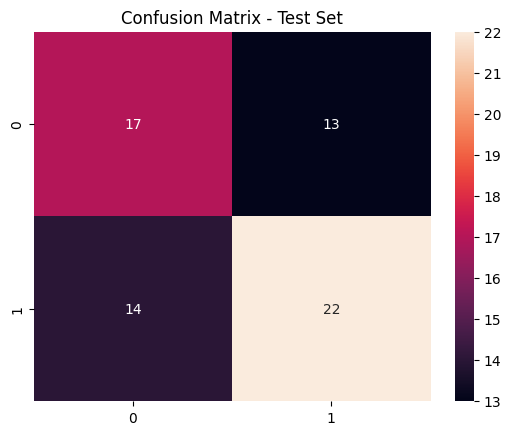

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


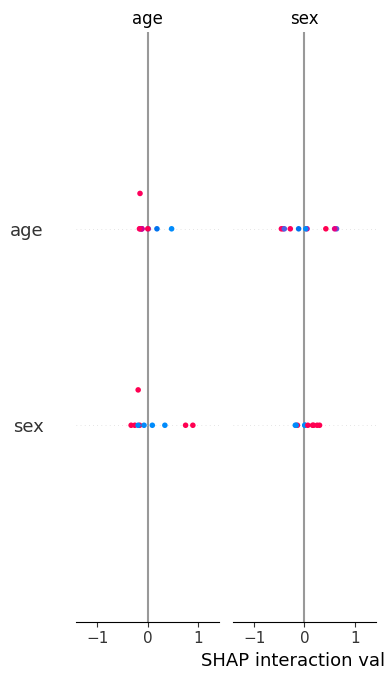

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from collections import deque
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load Dataset
url = '/content/drive/MyDrive/Colab Notebooks/Heart Disease/Heart Disease Cleveland/Heart_disease_cleveland_new.csv'
data = pd.read_csv(url)

# Step 1: Data Preprocessing
def preprocess_data(data):
    # Handle Missing Values
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            if data[col].dtype == 'object':
                data[col].fillna(data[col].mode()[0], inplace=True)
            else:
                data[col].fillna(data[col].mean(), inplace=True)

    # Separate Features and Target
    features = data.drop('target', axis=1)
    target = data['target']

    # Identify Categorical Columns
    categorical_cols = features.select_dtypes(include=['object']).columns

    # Label Encoding Categorical Variables
    le = LabelEncoder()
    for col in categorical_cols:
        features[col] = le.fit_transform(features[col])

    # Standardize Numerical Features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    features_df = pd.DataFrame(features_scaled, columns=features.columns)

    return features_df, target

# Preprocess the data
features, target = preprocess_data(data)

# Step 2: Handle Imbalanced Dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: DDQN Implementation
class DDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.update_target_network_steps = 5
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_network()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=(self.state_size,)))
        model.add(tf.keras.layers.Dense(128, activation='relu'))
        model.add(tf.keras.layers.Dense(128, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss='mse')
        return model

    def update_target_network(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state, verbose=0)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state, verbose=0)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

# Step 5: Training the DDQN Agent
state_size = X_train.shape[1]
action_size = 2  # Binary classification (0 or 1)
agent = DDQNAgent(state_size, action_size)
episodes = 100
batch_size = 64

for e in range(episodes):
    indices = np.random.permutation(len(X_train))
    for index in indices:
        state = X_train.iloc[index].values.reshape(1, -1)
        action = agent.act(state)
        reward = 1 if action == y_train.iloc[index] else -1  # Reward for correct classification
        next_index = (index + 1) % len(X_train)
        next_state = X_train.iloc[next_index].values.reshape(1, -1)
        done = (next_index == len(X_train) - 1)

        agent.remember(state, action, reward, next_state, done)

    # Train the agent with the experience of the episode
    agent.replay(batch_size)

    # Update the target network periodically
    if e % agent.update_target_network_steps == 0:
        agent.update_target_network()

    # Log progress
    if e % 50 == 0:
        print(f"Episode {e}/{episodes}, Epsilon: {agent.epsilon:.2f}")

# Step 6: Evaluation
test_predictions = []
for i in range(len(X_test)):
    state = X_test.iloc[i].values.reshape(1, -1)
    action = agent.act(state)
    test_predictions.append(action)

test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(classification_report(y_test, test_predictions))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set")
plt.show()

# Save the trained model
agent.save("/content/drive/MyDrive/Colab Notebooks/Heart Disease/ddqn_heart_disease_model.weights.h5")

# Step 7: Explainable AI with SHAP
# Explain predictions using SHAP
explainer = shap.KernelExplainer(agent.model.predict, X_train.sample(100, random_state=42))

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.iloc[:10])

# Visualize the feature importance for the test set
shap.summary_plot(shap_values, X_test.iloc[:10], feature_names=X_train.columns)
